In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

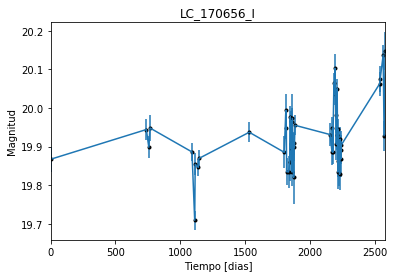

In [2]:
data = np.genfromtxt('LC_170656_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_170656_I')
plt.savefig("LC_170656_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

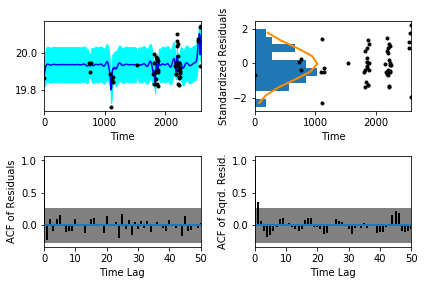

In [5]:
sample.assess_fit()

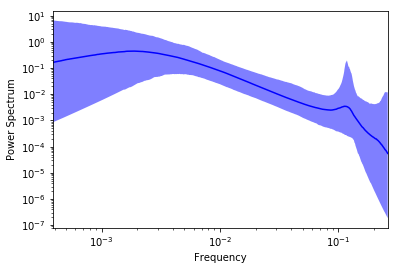

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

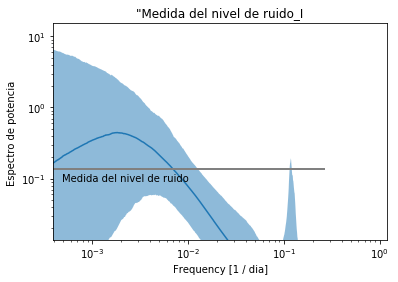

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_170656_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_170656_I')

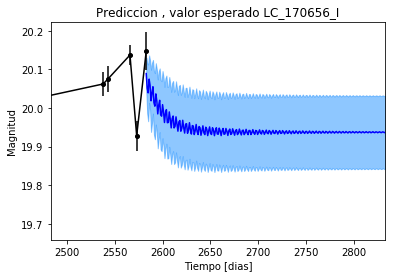

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_170656_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_170656_I')

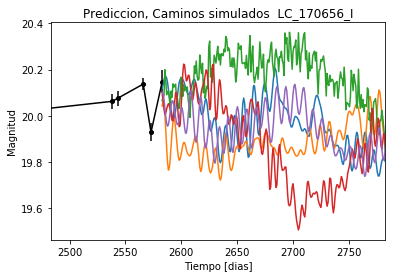

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_170656_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


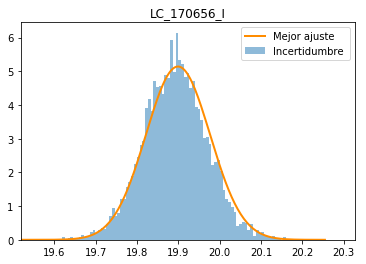

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_170656_I')
plt.savefig("Mejor_ajuste_LC_170656_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_170656_I')

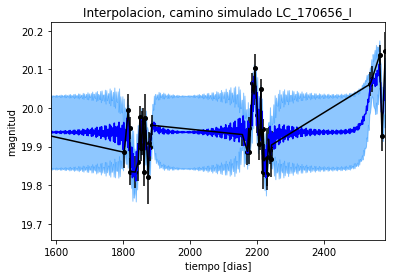

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_170656_I')

Text(0.5,1,'Interpolacion, camino simulado LC_170656_I')

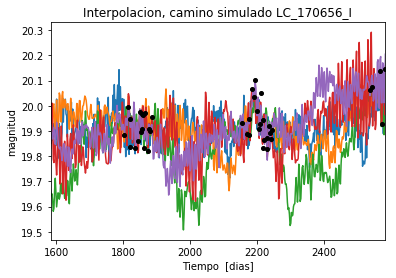

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_170656_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 228.0392912
Median: 0.00750084246474
Standard deviation: 0.0585110833357
68% credibility interval: [ 0.00252614  0.02598882]
95% credibility interval: [ 0.00087545  0.21163233]
99% credibility interval: [ 0.00049263  0.40271703]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 155.713109418
Median: 0.0074451857903
Standard deviation: 0.0528957541594
68% credibility interval: [ 0.00248422  0.02493903]
95% credibility interval: [ 0.0008317   0.19290185]
99% credibility interval: [ 0.00048928  0.38691192]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 913.781489084
Median: 0.00489991573679
Standard deviation: 0.137043578751
68% 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 486.372644059
Median: 79.6808134385
Standard deviation: 2.35158228291
68% credibility interval: [ 77.00128287  81.62046219]
95% credibility interval: [ 73.9208463   83.01069913]
99% credibility interval: [ 71.60422214  83.17992835]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 764.880678278
Median: 0.273175003956
Standard deviation: 1.18557916693
68% credibility interval: [ 0.07690253  1.94543673]
95% credibility interval: [ 0.03329479  4.04167012]
99% credibility interval: [ 0.02117876  6.46393779]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 138.204945755
Median: 1.37807846987
Standard deviation: 2.93378027413
68% credibility interval: [ 0.56271525  4.01473731]
95% credibility interval: [  0.45941003  10

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1563.78491731
Median: 1.69448196494e+23
Standard deviation: 3.53303276029e+94
68% credibility interval: [  4.64814825e-44   2.62813595e+59]
95% credibility interval: [  5.51127493e-121   1.47982245e+081]
99% credibility interval: [  6.94620401e-127   7.33694127e+085]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2575.52963203
Median: 19.9291223419
Standard deviation: 0.0309105841137
68% credibility interval: [ 19.90369721  19.95635542]
95% credibility interval: [ 19.86833591  19.9882483 ]
99% credibility interval: [ 19.81617656  20.02024878]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 156.586906708
Median: 0.15912293626
Standard deviation: 0.105501119906
68% credibility interval: [ 0.11716587  0.30527109]
95% credibility interval: [ 0.08058913  0.4498108 ]
99% credibility interval: [ 0.          0.50666029]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 156.586906708
Median: 0.15912293626
Standard deviation: 0.105501119906
68% credibility interval: [ 0.11716587  0.30527109]
95% credibility interval: [ 0.08058913  0.4498108 ]
99% credibility interval: [ 0.          0.50666029]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1664.15986266
Median: 0.0
Standard deviation: 0.00442959778433
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 486.372644059
Median: 79.6808134385
Standard deviation: 2.35158228291
68% credibility interval: [ 77.00128287  81.62046219]
95% credibility interval: [ 73.9208463   83.01069913]
99% credibility interval: [ 71.60422214  83.17992835]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 602.708999116
Median: 0.00923014426422
Standard deviation: 0.00607788130775
68% credibility interval: [ 0.00640262  0.01467939]
95% credibility interval: [ 0.00461155  0.02673546]
99% credibility interval: [ 0.00360771  0.0393518 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 798.07447048
Median: 1.09473861417
Standard deviation: 0.242460046409
68% credibility interval: [ 0.89687152  1.36681983]
95% credibility interval: [ 0.73978029  1.7004841 ]
99% credibility interval: [ 0.66377649  1.90494995]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 360.402223226
Median: 2.72665318295e-25
Standard deviation: 0.0836501805312
68% credibility interval: [  8.04401971e-62   4.64682680e-02]
95% credibility interval: [  7.51774162e-84   2.80648649e-01]
99% credibility interval: [  1.12406691e-87   5.52568046e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 228.0392912
Median: (-0.0471291831659-0.549727576064j)
Standard deviation: 0.758004089366
68% credibility interval: [-0.16329256-1.91601845j -0.01587223-0.74821563j]
95% credibility interval: [-1.32972512-3.02191728j -0.00550060-1.53932842j]
99% credibility interval: [-2.53034576-1.52505772j -0.00309527-0.75973927j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 155.713109418
Median: (-0.0467794819668+0.799232335102j)
Standard deviation: 0.741534255158
68% credibility interval: [-0.15669654+2.11650375j -0.01560881+0.76920471j]
95% credibility interval: [-1.21203808+1.17522513j -0.00522570+0.73827007j]
99% credibility interval: [-2.43103929+1.42066376j -0.00307426+0.j        ]
Posterior summary for parameter ar_roots  